In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [14]:
train_df = pd.read_csv('train.csv')
#test_df = pd.read_csv('test.csv')

train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
1041,1042,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
1278,1279,0,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S
1123,1124,0,3,"Wiklund, Mr. Karl Johan",male,21.0,1,0,3101266,6.4958,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
1243,1244,0,2,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
1204,1205,1,3,"Carr, Miss. Jeannie",female,37.0,0,0,368364,7.7500,NaN,Q
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S


In [4]:
train_df.shape[0]

1309

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
train_df.shape[0]

1309

In [7]:
train_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
train_mis = missing_values_table(train_df)
train_mis

Your selected dataframe has 12 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Cabin,1014,77.5
Age,263,20.1
Embarked,2,0.2
Fare,1,0.1


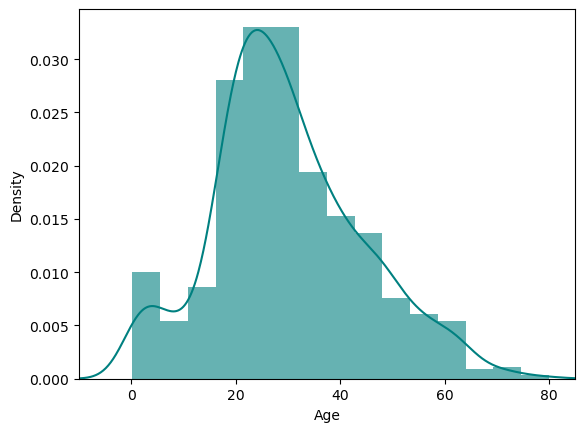

In [9]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [10]:
print(train_df["Age"].mean(skipna=True))

print(train_df["Age"].median(skipna=True))

29.881137667304014
28.0


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


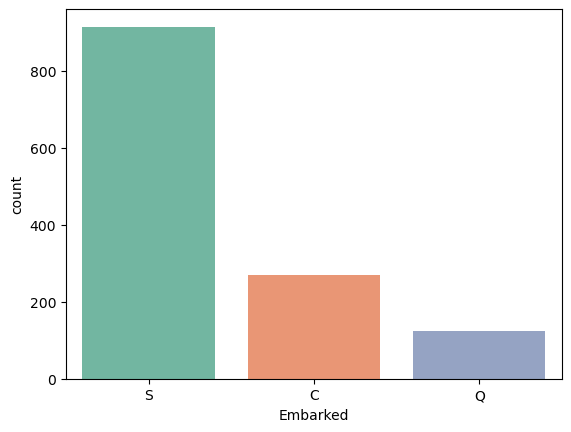

In [15]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [11]:
train_df['Embarked'].value_counts().idxmax()

'S'

In [16]:
train_data = train_df.copy()
train_data['Age'].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
# add Fare:
train_data['Fare'].fillna(train_df["Fare"].median(skipna=True), inplace=True)

In [13]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


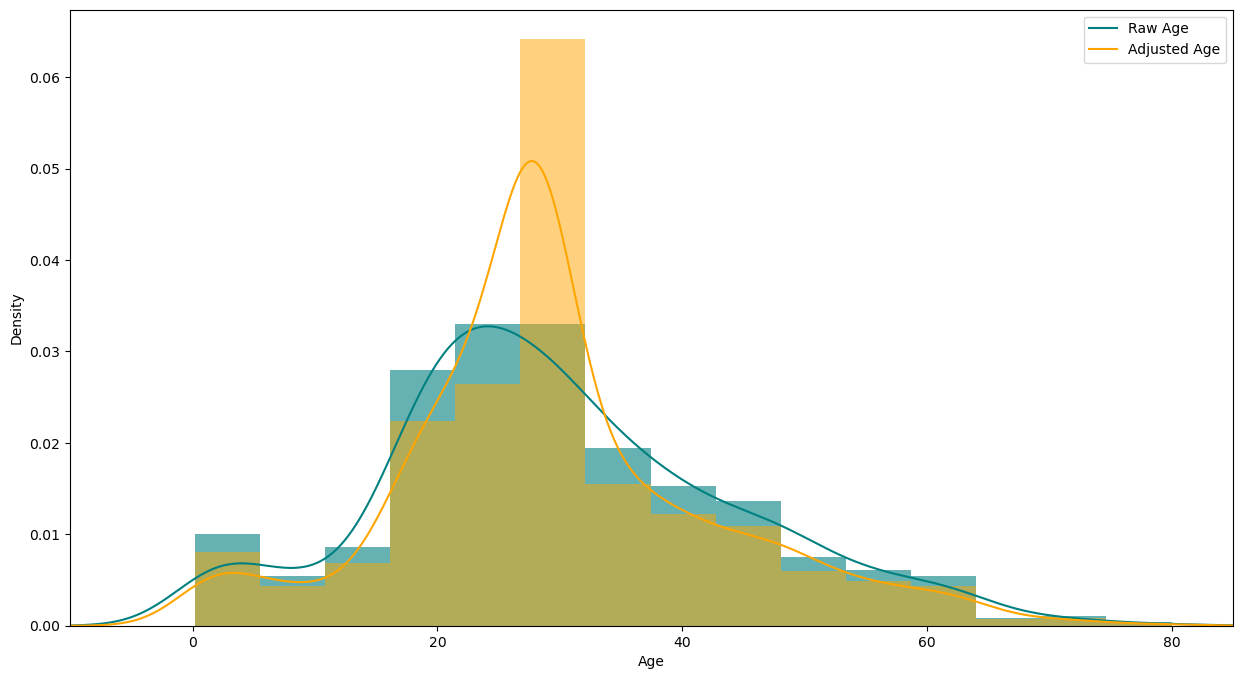

In [17]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

SibSp и Parch относятся к путешествию с семьей (возможна мультиколиниарность, поэтому обьединим в одну фичу)

In [18]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [19]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True


In [20]:
train_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [21]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

NameError: name 'test_df' is not defined

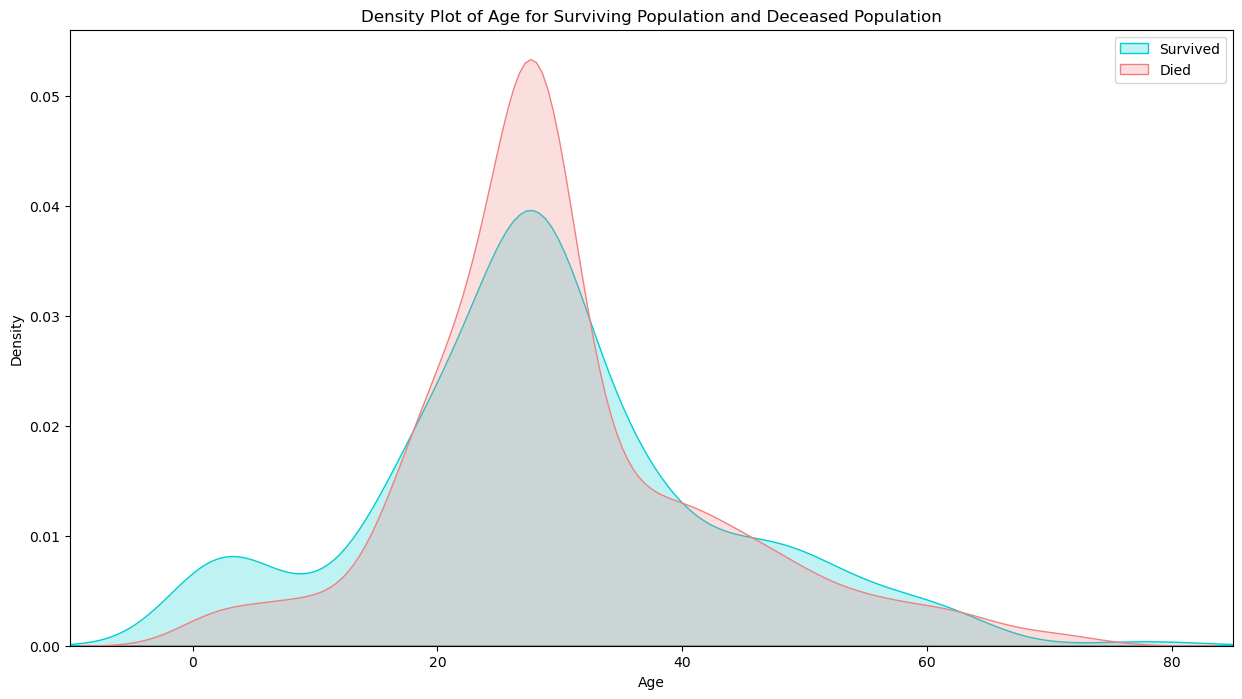

In [22]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

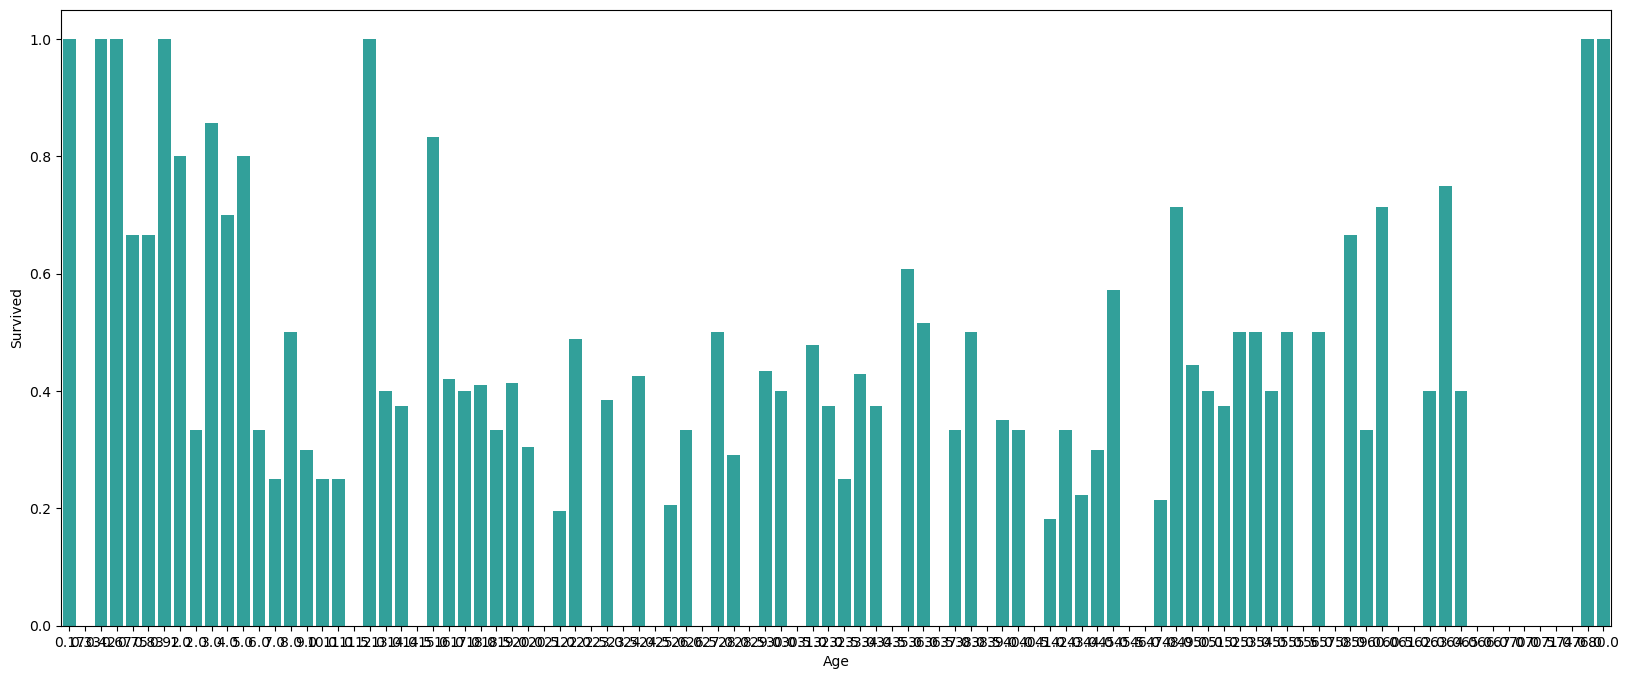

In [23]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [28]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

NameError: name 'final_test' is not defined

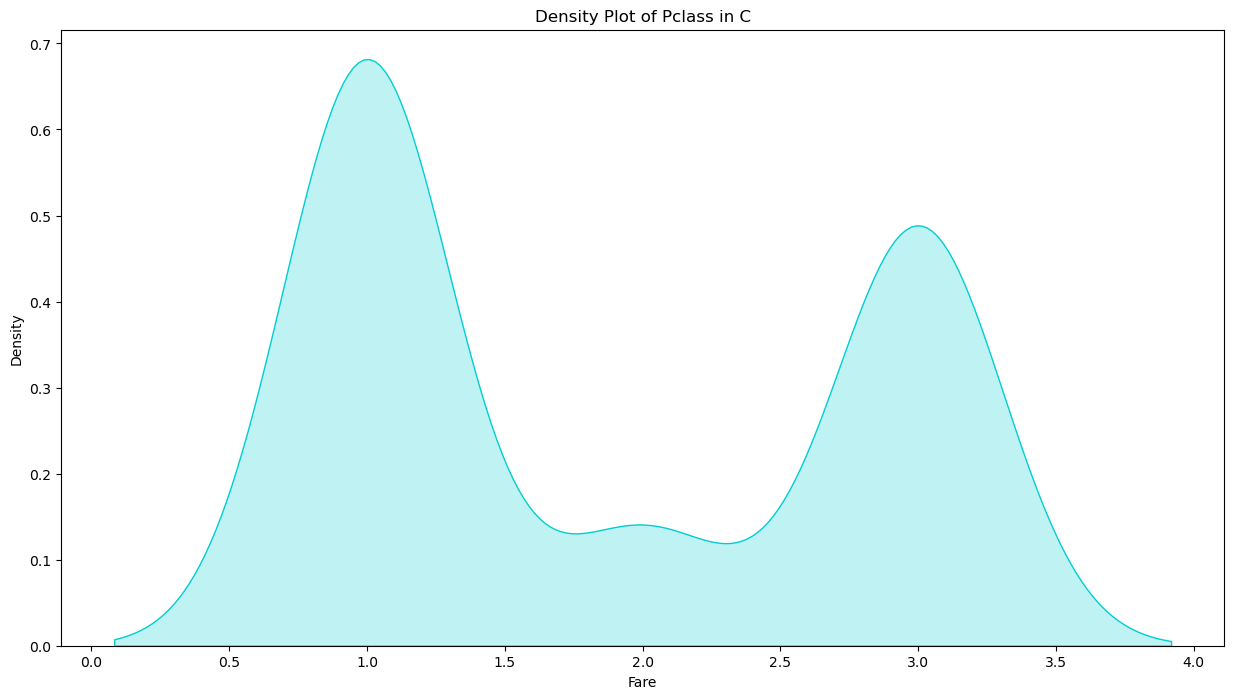

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_df["Pclass"][train_df.Embarked == 'C'], color="darkturquoise", shade=True)
plt.title('Density Plot of Pclass in C')
ax.set(xlabel='Fare')
plt.show()

In [25]:
train_df[train_df.Embarked == 'C']['Pclass'].value_counts()

Pclass
1    141
3    101
2     28
Name: count, dtype: int64

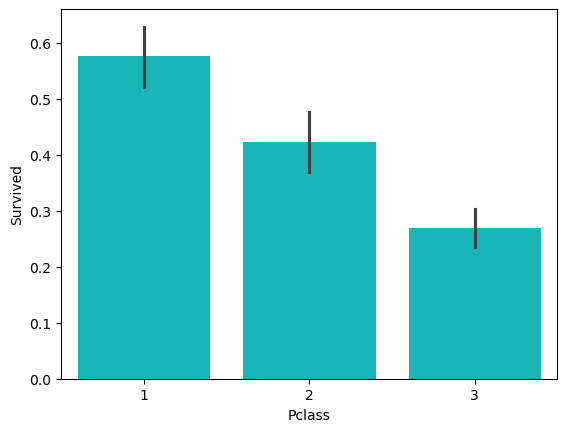

In [26]:
sns.barplot(data=train_df, x='Pclass', y='Survived', color="darkturquoise")
plt.show()

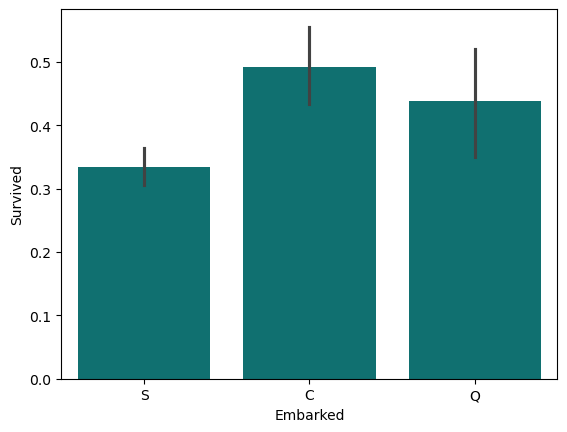

In [27]:
sns.barplot(data=train_df, x='Embarked', y='Survived', color="teal")
plt.show()

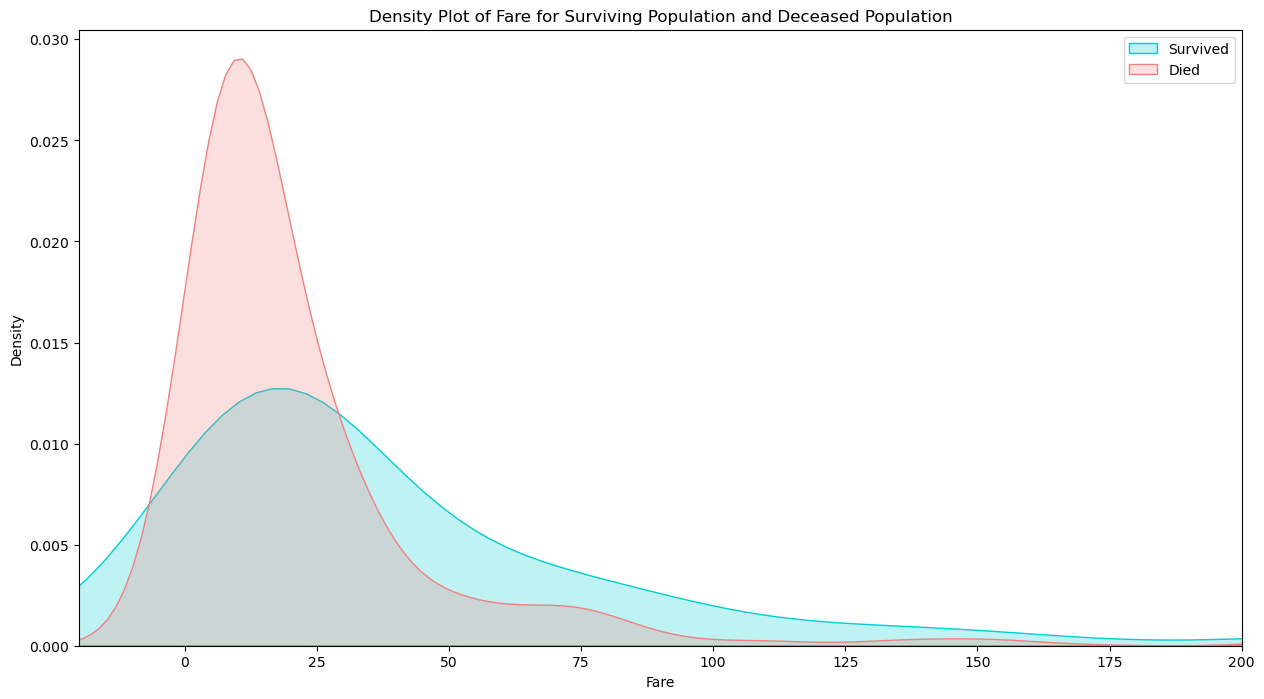

In [28]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

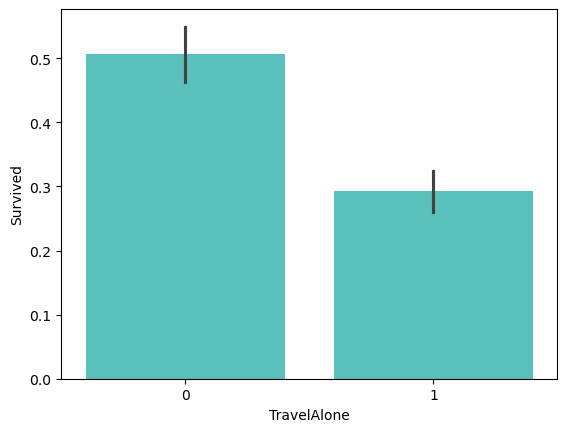

In [29]:
sns.barplot(data=final_train, x='TravelAlone', y='Survived', color="mediumturquoise")
plt.show()

# Пример дерева решений
### Цель - показать пример простого, наглядного и интерпритируемого алгоритма ML на примере Титаника

In [30]:
# Titanic extended dataset (full)
# выбираем наиболее значимые признаки (класс не учитываем, т.к. влияет цена билета
cols = ["Age","Fare","TravelAlone","Sex_male"]
X = final_train[cols]
y = final_train['Survived']

In [31]:
# Разбиваем список на две части для обучения 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42)

In [32]:
X_test.sample(5)

,Age,Fare,TravelAlone,Sex_male
596,28.0,33.0000,1,False
1227,32.0,13.0000,1,True
535,7.0,26.2500,0,False
244,30.0,7.2250,1,True
1254,27.0,8.6625,1,True


In [33]:
# Scikit-Learn - библиотека языка Питон: алгоритмы классификации,регрессии,кластеризации
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',#  критерий расщепления: энтропия
                                                     #  - мера неопределённости распределения,
                                                     #   чем больше, тем больше хаоса)
                                max_depth = 3)  # - допустимая глубина
                              # min_samples_leaf = 100)     
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

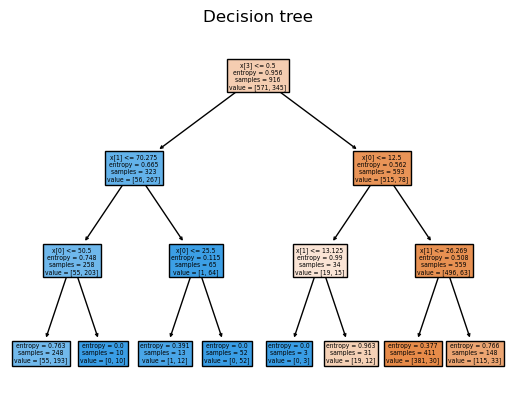

In [34]:
from sklearn import tree
tree.plot_tree(model)
from sklearn.tree import plot_tree
plot_tree(model, filled=True)
plt.title("Decision tree")
plt.show()


In [35]:
import pydot 
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

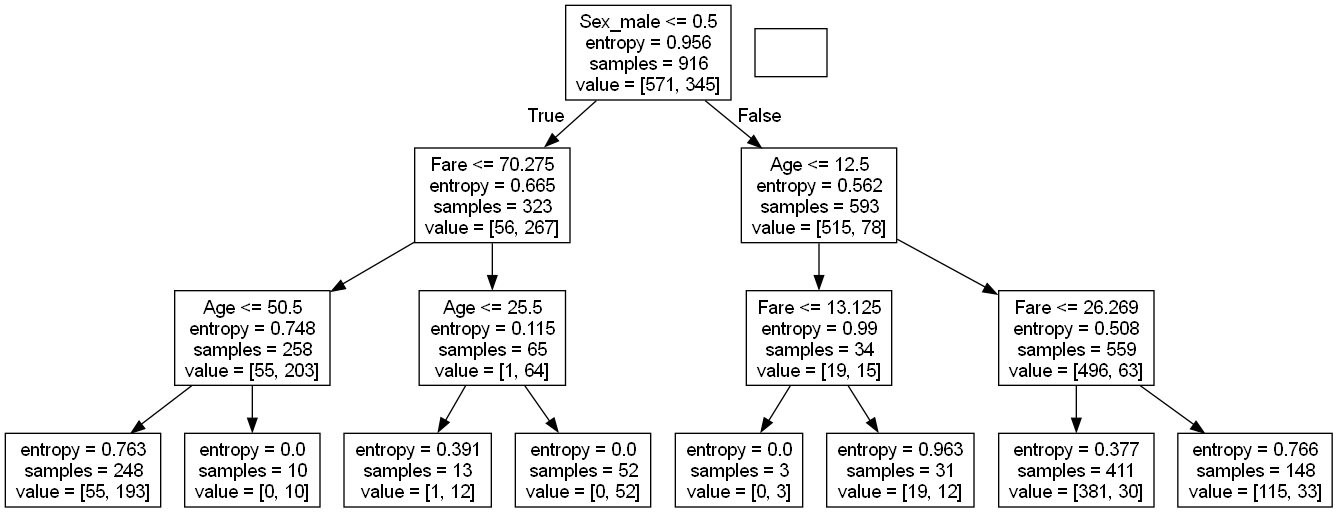

In [36]:
from six import StringIO
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, feature_names = ["Age","Fare","TravelAlone","Sex_male"])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [37]:
# строим прогноз  
y_predict = model.predict(X_test)

In [38]:
# добавляем действительные данные
X_test['y_test'] = y_test. tolist ()
# добавляем предсказанное значение
X_test['y_predict'] = y_predict. tolist ()
X_test.sample(5)

,Age,Fare,TravelAlone,Sex_male,y_test,y_predict
1195,28.0,7.7500,1,False,1,1
1033,61.0,262.3750,0,True,0,0
591,52.0,78.2667,0,False,1,1
490,28.0,19.9667,0,True,0,0
1213,26.0,13.0000,1,True,0,0


In [127]:
#df1 = pd.DataFrame(X_test)
X_test.to_excel("output.xlsx")  

In [39]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predict)

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(matrix)

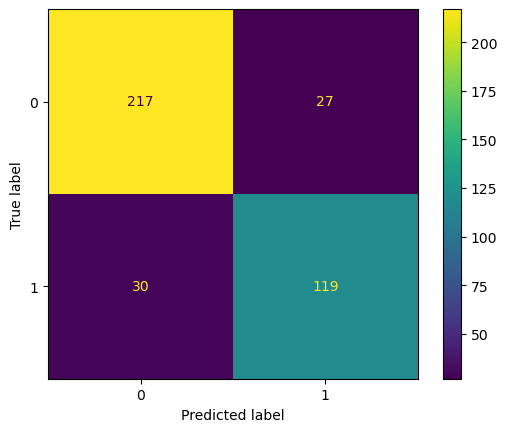

In [41]:
from matplotlib import pyplot as plt
disp.plot() 
plt.show()

<Axes: >

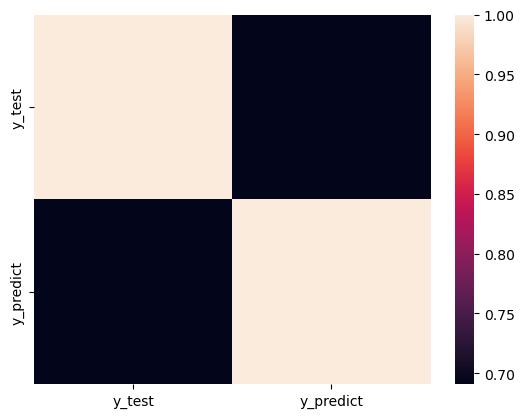

In [42]:
# посчитать корреляцию !
import numpy as np
covar = np.cov(np.array(y_test), y_predict)
from scipy import stats
corr = stats.pearsonr(np.array(y_test), y_predict)[0]

#sns.jointplot(data=X_test, x='y_test', y='y_predict', kind='reg')

my_corr = pd.DataFrame()
my_corr['y_test'], my_corr['y_predict'] = X_test['y_test'], X_test['y_predict']
sns.heatmap(my_corr.corr())

In [43]:
# Оценка точности - насколько объясняет 
from sklearn.model_selection import cross_val_score
decisiontree_scores = cross_val_score(model, X, y, cv=10)
decisiontree_scores.mean()

0.8473106283029948

In [44]:
# Импорт структуры дерева в текст - интерпретируемость:
from sklearn.tree import export_text
r = export_text(model, feature_names = ["Age","Fare","TravelAlone","Sex_male"])
print(r)

|--- Sex_male <= 0.50
|   |--- Fare <= 70.28
|   |   |--- Age <= 50.50
|   |   |   |--- class: 1
|   |   |--- Age >  50.50
|   |   |   |--- class: 1
|   |--- Fare >  70.28
|   |   |--- Age <= 25.50
|   |   |   |--- class: 1
|   |   |--- Age >  25.50
|   |   |   |--- class: 1
|--- Sex_male >  0.50
|   |--- Age <= 12.50
|   |   |--- Fare <= 13.12
|   |   |   |--- class: 1
|   |   |--- Fare >  13.12
|   |   |   |--- class: 0
|   |--- Age >  12.50
|   |   |--- Fare <= 26.27
|   |   |   |--- class: 0
|   |   |--- Fare >  26.27
|   |   |   |--- class: 0



In [46]:
model.feature_importances_

array([0.05567338, 0.08917554, 0.        , 0.85515108])

In [52]:
model.feature_importances_
importance_df = pd.DataFrame({
                'Feature': X_train.columns,  
                'Importance': model.feature_importances_
                }).sort_values('importance', ascending=False)

In [53]:
print(importance_df)

       feature  importance
3     Sex_male    0.855151
1         Fare    0.089176
0          Age    0.055673
2  TravelAlone    0.000000
